In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Add src folder to path
sys.path.append(os.path.abspath('../src'))

# Import functions
from correlation_analysis import load_data, perform_sentiment_analysis, calculate_correlations

# Define the stock symbols
stocks = ['AAPL', 'AMZN', 'GOOG', 'META']

# Define paths
project_root = os.path.abspath('..')
news_path = os.path.join(project_root, 'Data', 'corrected_analyst_ratings.csv')
stock_dir = os.path.join(project_root, 'Data', 'yfinance_data')


In [2]:
# Load news and stock data
try:
    news_df, stock_data = load_data(stocks, news_path=news_path, stock_dir=stock_dir)
except Exception as e:
    print(f"Error loading data: {e}")
    raise

print("✅ Loaded stocks:", stock_data.keys())
print("📰 News data sample:")
print(news_df.head())

# Align date format for news
news_df['date_only'] = pd.to_datetime(news_df['date']).dt.date

# Align stock data by adding 'date_only', skipping invalid entries
for stock in stocks:
    if stock in stock_data:
        stock_data[stock]['date_only'] = stock_data[stock].index.date
    else:
        print(f"⚠️ Skipping date_only for {stock} – not in stock_data.")

# Display a sample if available
if 'AAPL' in stock_data:
    print("📊 Sample stock data with date_only:")
    print(stock_data['AAPL'].head())


✅ Loaded stocks: dict_keys(['AAPL', 'AMZN', 'GOOG', 'META'])
📰 News data sample:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock   date_only  
0 2020-06-0

In [3]:
# Perform sentiment analysis
daily_sentiment = perform_sentiment_analysis(news_df)
print("Daily sentiment sample:")
print(daily_sentiment.head())

Daily sentiment sample:
   date_only  sentiment
0 2020-05-22   0.009615
1 2020-05-26   0.000000
2 2020-06-03   0.000000
3 2020-06-05   0.000000


In [4]:
# Add this to Cell 3 to inspect
print("Sample stock data with date_only:")
print(stock_data['AAPL'].head())

Sample stock data with date_only:
                Close       High        Low       Open       Volume  \
Date                                                                  
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400.0   
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800.0   
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200.0   
2020-01-07  72.146950  72.753831  71.926922  72.497537  108872000.0   
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200.0   

             date_only  
Date                    
2020-01-02  2020-01-02  
2020-01-03  2020-01-03  
2020-01-06  2020-01-06  
2020-01-07  2020-01-07  
2020-01-08  2020-01-08  


Correlation between AAPL daily returns and news sentiment: -0.09
Correlation between AMZN daily returns and news sentiment: -0.42
Correlation between GOOG daily returns and news sentiment: -0.10
Correlation between META daily returns and news sentiment: 0.48


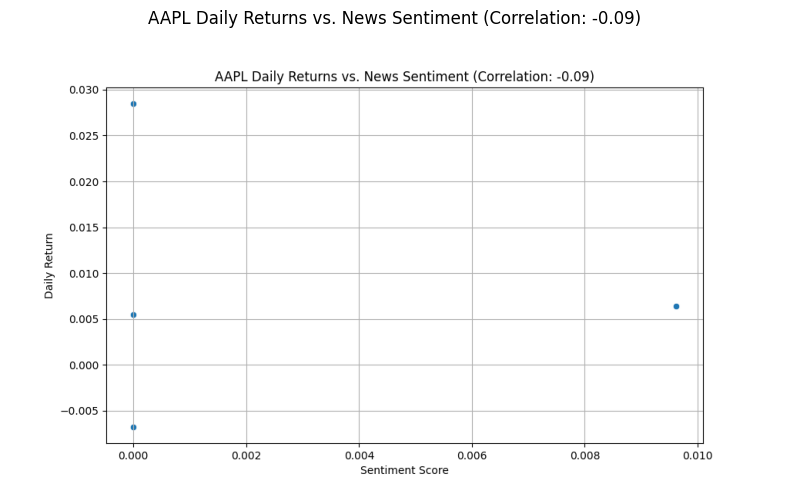

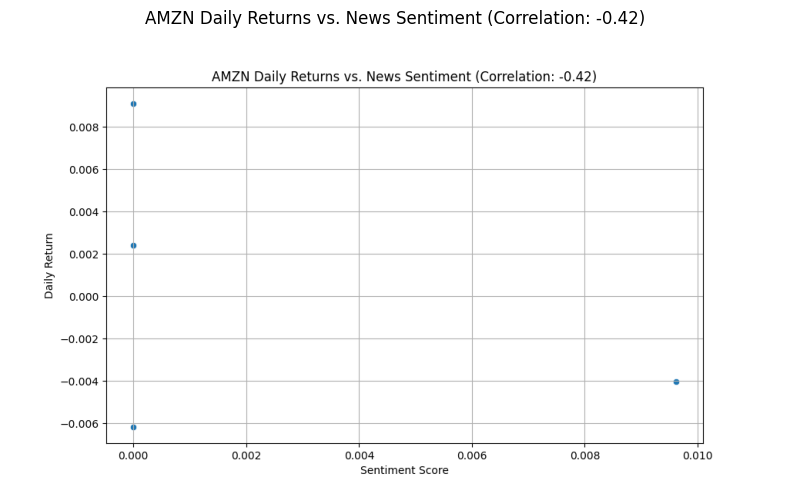

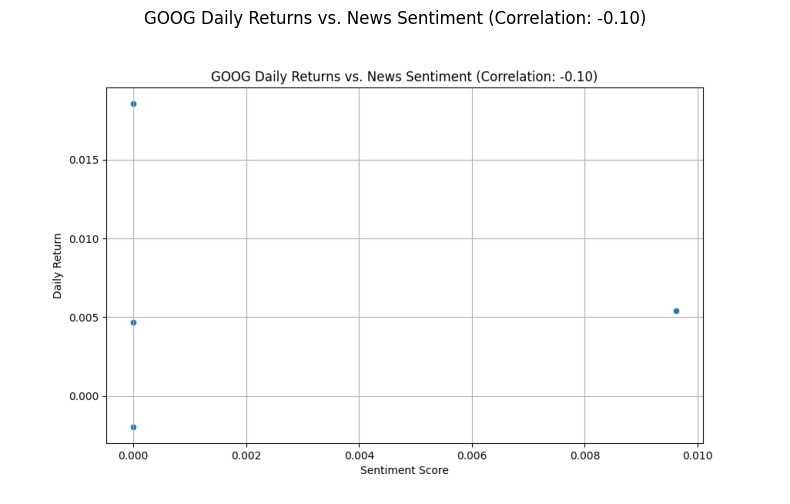

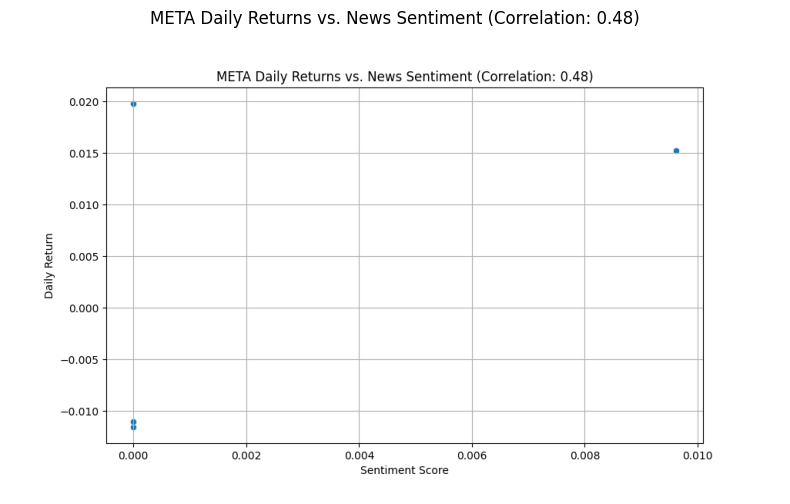

In [5]:
# Calculate correlations and generate scatter plots
output_dir = 'figures/'
os.makedirs(output_dir, exist_ok=True)
correlations = calculate_correlations(stock_data, daily_sentiment, stocks, output_dir=output_dir)

# Display plots inline
for stock in stocks:
    img_path = os.path.join(output_dir, f'{stock}_sentiment_return_scatter.png')
    if os.path.exists(img_path):
        plt.figure(figsize=(10, 6))
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{stock} Daily Returns vs. News Sentiment (Correlation: {correlations.get(stock, "N/A"):.2f})')
        plt.show()
    else:
        print(f"Scatter plot for {stock} not found at {img_path}.")